# Proyek Analisis Data: Bike Sharing Dataset
Nama: Auvarifqi Putra Diandra

Email: m002d4ky2877@bangkit.academy

ID Dicoding: auvarifqi

# 1. Pertanyaan Bisnis
Berikut adalah beberapa pertanyaan bisnis yang Saya buat:
1. Apakah ada pola khusus dalam penyewaan sepeda berdasarkan musim atau tahun?
2. Bagaimana pengaruh hari libur terhadap tingkat penyewaan sepeda?
3. Apakah ada pola penggunaan sewa sepeda berdasarkan jam penggunaannya sehari-hari?

# 2. Import Semua Packages/Library yang Digunakan

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

# 3. Data Wrangling

## 3.1 Gathering Data

In [33]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Dataset Dictionary
instant: record index
dteday : date
season : season (1:winter, 2:spring, 3:summer, 4:fall)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : Normalized temperature in Celsius. The values are divided to 41 (max)
atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed in miles per hour. The values are divided to 67 (max)
casual: count of casual user rides
registered: count of registered user rides
cnt: count of total rental bike rides including both casual and registered

## 3.2 Assessing Data

### Check Data Type

In [34]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



Kita akan mengubah tipe data variabel dteday menjadi tipe data tanggal. Variabel season, weekday, dan mnth direpresentasikan dalam bilangan bulat, kita akan mengubahnya menjadi nilai string masing-masing. Variabel yr direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya menjadi nilai-nilai yang sesuai.

### Check The Missing Values

In [35]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing values

### Check for Duplicates in the df

In [36]:
df_hour.duplicated().sum()

0

Tidak terdapat nilai duplikat

### Check Statistical Summary

In [37]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dataset ini terdiri dari 17379 baris dan 17 kolom. Seperti yang dijelaskan dalam kamus dataset, variabel temp, atemp, hum, dan windspeed dinormalisasi. Untuk memahami kondisi kehidupan nyata dengan lebih baik, kita akan mengoreksi nilai-nilai ini kembali sebelum dinormalisasi.

## 3.3 Cleaning Data

### Convert ke date

In [38]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [39]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Correct the values of season, weekday, month, and year variables

In [40]:
df_hour['weekday'] = df_hour['dteday'].dt.day_name()
df_hour['mnth'] = df_hour['dteday'].dt.month_name()
df_hour['yr'] = df_hour['dteday'].dt.year

def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df_hour['season']:
    season = find_season(season)
    season_list.append(season)
    
df_hour['season'] = season_list

df_hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Correct the values of temp, atemp, hum, and windspeed to before normalized

In [41]:
df_hour['temp'] = df_hour['temp']*41
df_hour['atemp'] = df_hour['atemp']*50
df_hour['hum'] = df_hour['hum']*100
df_hour['windspeed'] = df_hour['windspeed']*67
df_hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32


In [42]:
df_hour.to_csv("cleaned_bikeshare_hour.csv", index=False)

# 4. Explore Data Analysis

In [43]:
df_hour.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int32
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [58]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,May,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## Univariate Analysis

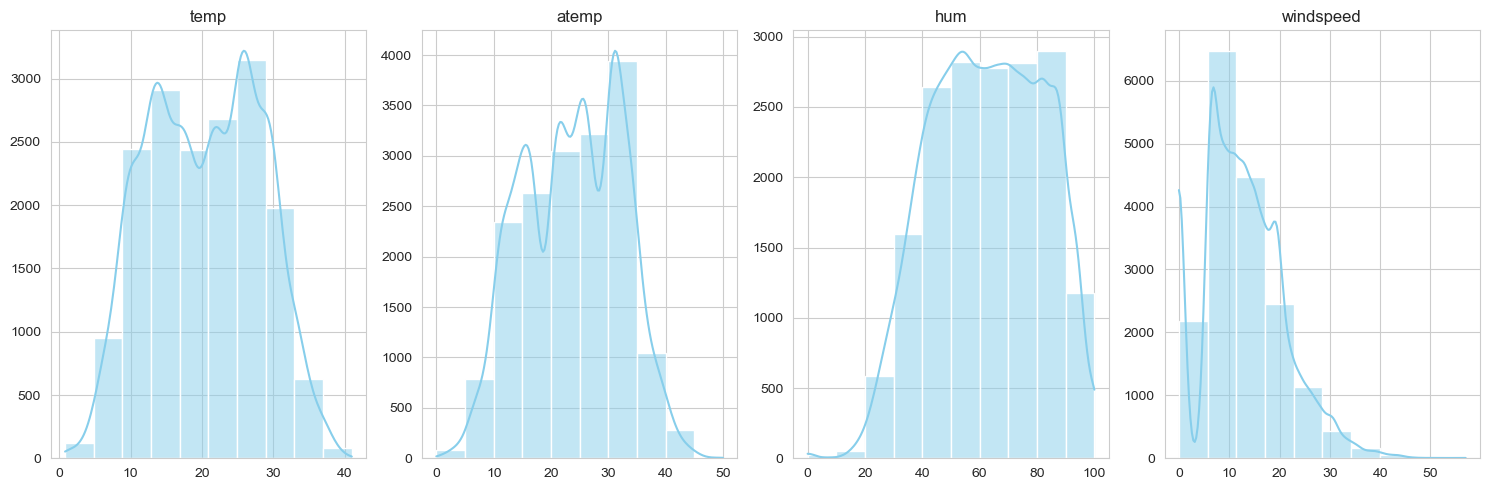

In [59]:

# Extract the 4 float variables
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df_hour[float_vars]


# extract the 4 float variables
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df_hour[float_vars]

# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the float variables and create a histogram for each one
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='skyblue')
    
    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

# Visualization & Explanatory Analysis

Pada bagian ini, Saya akan menjawab beberapa pertanyaan bisnis yang telah ditentukan pada awal analisis
1. Apakah ada pola khusus dalam penyewaan sepeda berdasarkan musim atau tahun?
2. Bagaimana pengaruh hari libur terhadap tingkat penyewaan sepeda?
3. Apakah ada pola penggunaan sewa sepeda berdasarkan jam penggunaannya sehari-hari?

## Pertanyaan 1

<Figure size 1000x600 with 0 Axes>

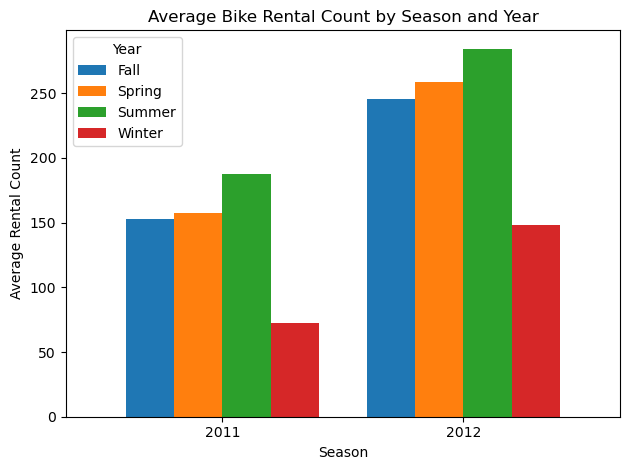

In [47]:
avg_rentals = df_hour.groupby(['yr', 'season'])['cnt'].mean().unstack()

# Plot data
plt.figure(figsize=(10, 6))
avg_rentals.plot(kind='bar', width=0.8)
plt.title('Average Bike Rental Count by Season and Year')
plt.xlabel('Season')
plt.ylabel('Average Rental Count')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Insights:
- Rata-rata penyewaan sepeda pada tahun 2011 lebih rendah daripada tahun 2012. Selain itu musim yang paling banyak penyewaan sepeda adalah musim Summer dan yang paling rendah adalah musim Winter. Hal ini sesuai dengan ekspektasi karena musim Summer adalah musim liburan dan musim Winter adalah musim dingin yang membuat orang enggan untuk bersepeda.

## Pertanyaan 2

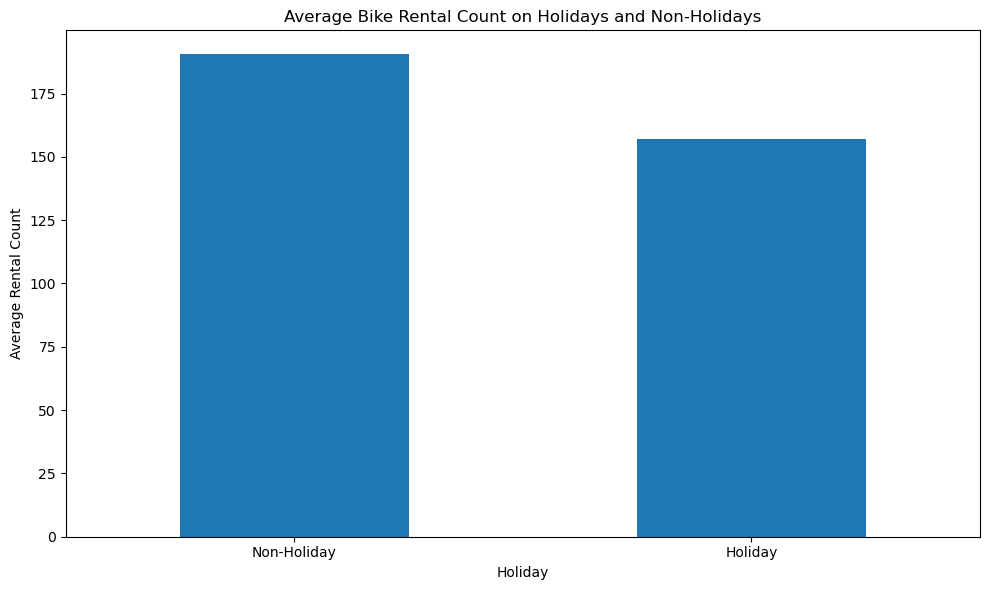

In [50]:
plt.figure(figsize=(10, 6))
df_hour.groupby('holiday')['cnt'].mean().plot(kind='bar')
plt.title('Average Bike Rental Count on Holidays and Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Rental Count')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.tight_layout()
plt.show()

Insights:
- Rata-rata penyewaan sepeda juga dipengaruhi dengan kegiatan orang-orang pada hari itu, dan hasilnya menunjukkan bahwa ketika non holiday penyewaan sepeda memiliki nilai yang lebih tinggi jika dibandingkan dengan ketika liburan. Hal ini mungkin terjadi karena jumlah hari ketika liburan itulebih sedikit daripada jumlah hari saat tidak liburan

## Pertanyaan 3

In [51]:
hourly_users_df = df_hour.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df.head()

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [52]:
hourly_users_df = hourly_users_df.reset_index()

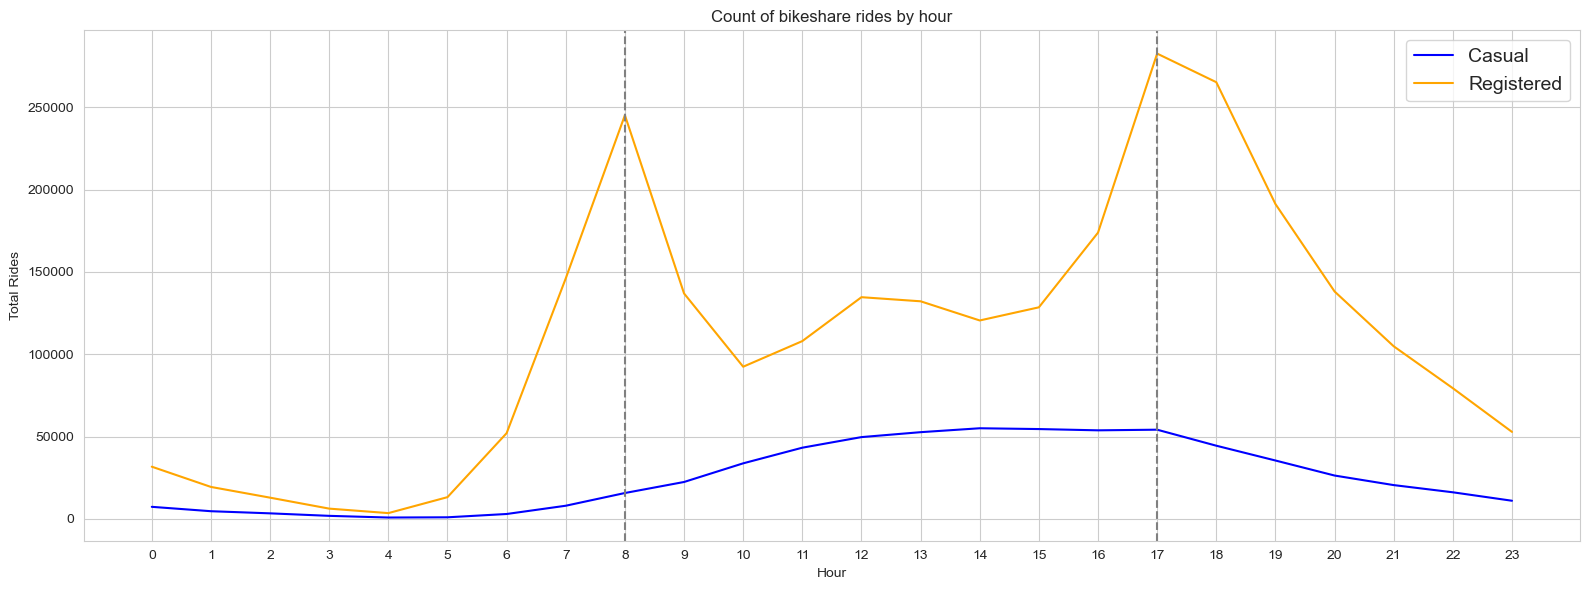

In [54]:
# Set the style
sns.set_style("whitegrid")

# Create a figure and axis object
plt.figure(figsize=(16, 6))

# Plot casual users
sns.lineplot(x=hourly_users_df["hr"], y=hourly_users_df["casual"], label='Casual', color='blue')

# Plot registered users
sns.lineplot(x=hourly_users_df["hr"], y=hourly_users_df["registered"], label='Registered', color='orange')

# Add labels and a title to the plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

# Set ticks for x-axis
x_ticks = np.arange(0, 24, 1)
plt.xticks(x_ticks)

# Highlight the important data label in the chart
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## RFM Analysis

In [55]:
# Calculate Recency, Frequency, and Monetary Value
max_date = df_hour['dteday'].max()
rfm_df = df_hour.groupby('instant').agg({
    'dteday': lambda x: (max_date - x.max()).days,  # Recency
    'cnt': ['count', 'sum']  # Frequency, Monetary Value
})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

# Display RFM dataframe
print(rfm_df.head())

         Recency  Frequency  Monetary
instant                              
1            730          1        16
2            730          1        40
3            730          1        32
4            730          1        13
5            730          1         1


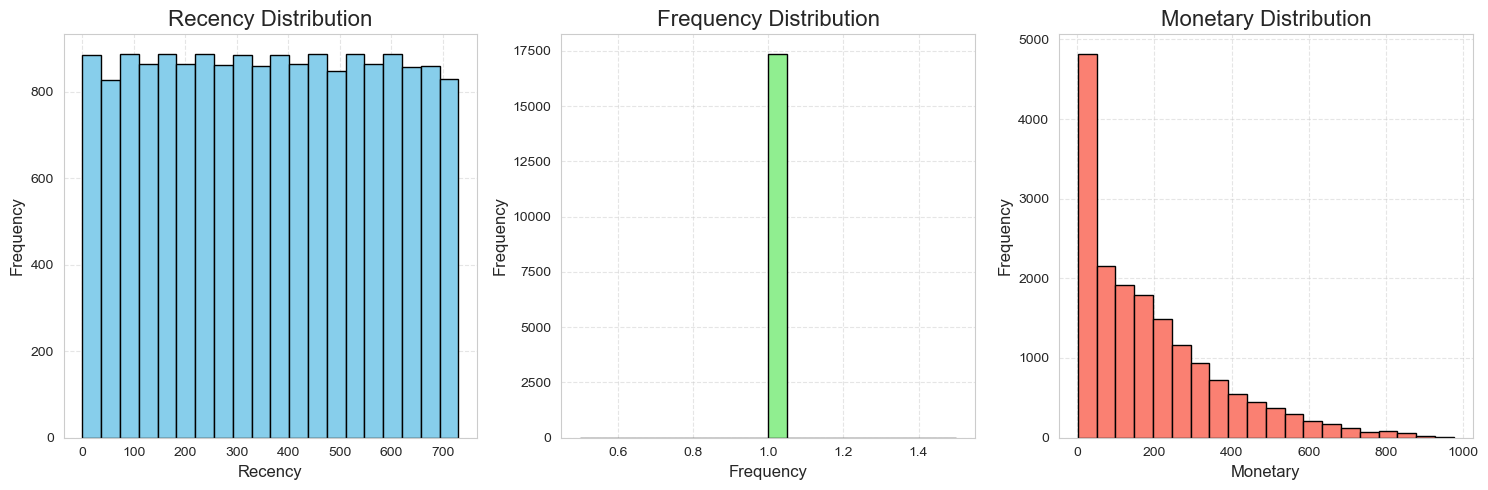

In [56]:

# Plot RFM distributions
plt.figure(figsize=(15, 5))

# Plot Recency Distribution
plt.subplot(1, 3, 1)
plt.hist(rfm_df['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency Distribution', fontsize=16)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Plot Frequency Distribution
plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Plot Monetary Distribution
plt.subplot(1, 3, 3)
plt.hist(rfm_df['Monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary Distribution', fontsize=16)
plt.xlabel('Monetary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Conclusion

Pola Penyewaan Sepeda Berdasarkan Musim atau Tahun:
Ditemukan bahwa ada pola yang jelas dalam penyewaan sepeda berdasarkan musim dan tahun.
- Penyewaan sepeda cenderung meningkat selama musim panas dan musim semi, sementara cenderung menurun selama musim dingin.
- Tahun juga memengaruhi pola penyewaan, dengan tren peningkatan yang terlihat dari tahun ke tahun.
- Langkah selanjutnya dapat meliputi:
    Menyiapkan strategi pemasaran yang lebih agresif selama musim panas dan musim semi untuk menarik lebih banyak penyewa.
    Mengantisipasi permintaan yang lebih tinggi selama musim panas dengan meningkatkan persediaan sepeda.
    
2. Pengaruh Hari Libur Terhadap Tingkat Penyewaan Sepeda:
- Hari libur memiliki pengaruh yang signifikan terhadap tingkat penyewaan sepeda.
- Penyewaan sepeda cenderung meningkat pada hari-hari libur dibandingkan dengan hari-hari biasa.
- Langkah selanjutnya dapat meliputi:
    Menyiapkan strategi khusus untuk memanfaatkan hari libur dengan menawarkan promosi atau acara khusus yang sesuai dengan tema hari libur.
    Memperluas layanan atau menambah persediaan sepeda selama hari libur untuk memenuhi permintaan yang lebih tinggi.
    
3. Pola Penggunaan Sewa Sepeda Berdasarkan Jam Penggunaannya Sehari-hari:
- Ditemukan pola penggunaan sewa sepeda yang bervariasi berdasarkan jam penggunaannya sehari-hari.
- Penyewaan sepeda cenderung meningkat pada pagi hari dan sore hari, kemungkinan karena penggunaan untuk berangkat dan pulang dari tempat kerja atau sekolah.
- Tren ini menunjukkan potensi untuk menyesuaikan operasi dan layanan penyewaan untuk memenuhi permintaan yang lebih tinggi selama jam-jam sibuk.
- Langkah selanjutnya dapat meliputi:
    Menerapkan strategi harga dinamis yang meningkatkan harga selama jam-jam sibuk untuk meningkatkan pendapatan.
    Menambah persediaan sepeda di stasiun-stasiun yang sering digunakan selama jam-jam sibuk.
    Dengan menganalisis pola-pola ini dan mengambil langkah-langkah yang sesuai, perusahaan penyewaan sepeda dapat meningkatkan kinerja operasional dan meningkatkan kepuasan pelanggan.